In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cm as cm

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

Text(0.5, 1.0, 'Simplest default with labels')

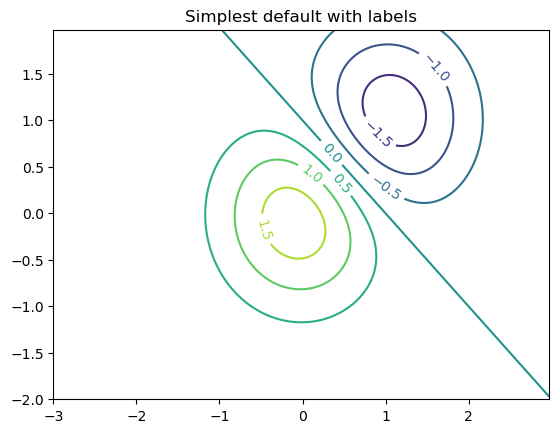

In [2]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')

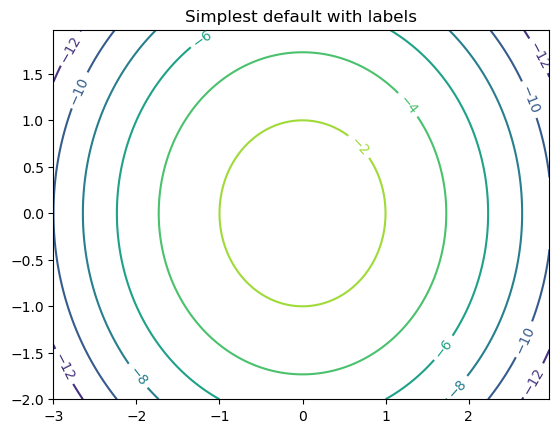

In [15]:
import scipy
import nutopy

delta = 0.025
rs  = np.arange(-3.0, 3.0, delta)
prs = np.arange(-2.0, 2.0, delta)
RS, PRS = np.meshgrid(rs, prs)
PTS = np.zeros((len(prs), len(rs)))

def pthetafun(r, pr, pzero, i, j):
    def fun(ptheta):
        return pr**2 + r**2 + pzero + ptheta
    # solve fun(ptheta) = 0
    # for ptheta_guess, use a value close to PTS[i, j]: do not access PTS[i, j] directly or out of bounds
    m, n = PTS.shape
    if i == 0:
        i_ = 1
    elif i == m - 1:
        i_ = m - 2
    else:
        i_ = i+1
    if j == 0:
        j_ = 1
    elif j == n - 1:
        j_ = n - 2
    else:
        j_ = j+1
    pheta_guess = PTS[i_, j_]
    #ptheta_sol = scipy.optimize.fsolve(fun, pheta_guess)
    options = nutopy.nle.Options(Display='off')
    sol = nutopy.nle.solve(fun, pheta_guess, options=options)
    return sol.x

pzero = 1.0
for j, r in enumerate(rs):
    for i, pr in enumerate(prs):
        H = pthetafun(r, pr, pzero, i, j)
        PTS[i,j] = H
    
fig, ax = plt.subplots()
CS = ax.contour(RS, PRS, PTS)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')
pass
